<a href="https://colab.research.google.com/github/vedanth-aggarwal/fer-may-hackathon-vedanth/blob/vedanth_futurex/machinelearning_vedanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading Fer2013 Dataset

## Method 1 : Opendatasets library

In [ ]:
!pip install opendatasets
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/msambare/fer2013'
od.download(dataset_url)

# {"username":"vedanthaggarwal","key":"c868f308d5ea632cd9181796a112e745"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedanthaggarwal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 233MB/s]


## Method 2 : Kaggle API

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [2]:
!kaggle datasets download -d msambare/fer2013
!unzip /content/fer2013.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/sad/Training_65242339.jpg  
  inflating: /content/train/sad/Training_65267116.jpg  
  inflating: /content/train/sad/Training_65275626.jpg  
  inflating: /content/train/sad/Training_6529266.jpg  
  inflating: /content/train/sad/Training_65329617.jpg  
  inflating: /content/train/sad/Training_65338712.jpg  
  inflating: /content/train/sad/Training_65338797.jpg  
  inflating: /content/train/sad/Training_65387162.jpg  
  inflating: /content/train/sad/Training_65404494.jpg  
  inflating: /content/train/sad/Training_65426218.jpg  
  inflating: /content/train/sad/Training_65430136.jpg  
  inflating: /content/train/sad/Training_65437377.jpg  
  inflating: /content/train/sad/Training_6545735.jpg  
  inflating: /content/train/sad/Training_65463385.jpg  
  inflating: /content/train/sad/Training_65473985.jpg  
  inflating: /content/train/sad/Training_65502829.jpg  
  inflating: /content/train/sad/Training_65505359.jpg  

In [ ]:
# Inspect data

!ls fer2013/train

angry  disgust	fear  happy  neutral  sad  surprise


# Exploring & Visualizing Dataset

##Directory Structure

In [ ]:
# Explore directories of dataset
import os

for dirpath,dirnames,filenames in os.walk('fer2013'):
  print(f'Directorites {len(dirnames)} / Images {len(filenames)} / in {dirpath}')


Directorites 2 / Images 0 / in fer2013
Directorites 7 / Images 0 / in fer2013/train
Directorites 0 / Images 4965 / in fer2013/train/neutral
Directorites 0 / Images 4097 / in fer2013/train/fear
Directorites 0 / Images 4830 / in fer2013/train/sad
Directorites 0 / Images 3995 / in fer2013/train/angry
Directorites 0 / Images 7215 / in fer2013/train/happy
Directorites 0 / Images 3171 / in fer2013/train/surprise
Directorites 0 / Images 436 / in fer2013/train/disgust
Directorites 7 / Images 0 / in fer2013/test
Directorites 0 / Images 1233 / in fer2013/test/neutral
Directorites 0 / Images 1024 / in fer2013/test/fear
Directorites 0 / Images 1247 / in fer2013/test/sad
Directorites 0 / Images 958 / in fer2013/test/angry
Directorites 0 / Images 1774 / in fer2013/test/happy
Directorites 0 / Images 831 / in fer2013/test/surprise
Directorites 0 / Images 111 / in fer2013/test/disgust


In [ ]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np

data_dir = pathlib.Path('fer2013/train')
# Create a list of class names as subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype='<U8')

## Visualizing Images & Checking Image Types

### Verify file type

In [ ]:

import os

image_exts = ['jpeg', 'jpg', 'png'] # image extensions


data_dir = 'train'

for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

""" Verify if all files in the dataset are valid image files and not of other file types """

### Plot random image

(48, 48)


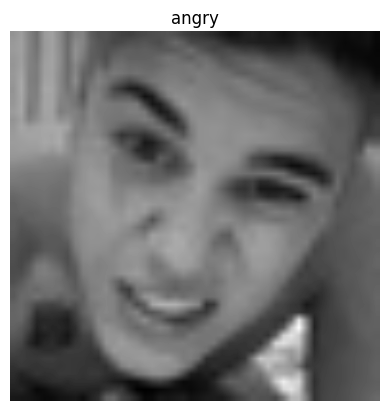

In [ ]:
# Function to view random image from dataset

import matplotlib.image as mpimg
import random

def view_rand_img(target_dir,target_class):
  target_folder = target_dir + '/' + target_class
  rand_img = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + rand_img[0])

  plt.imshow(img/255.,cmap='gray',interpolation='bilinear')
  plt.title(target_class)
  plt.axis('off')
  print(img.shape) # show image shape
  return img

img = view_rand_img('fer2013/train','angry')

In [ ]:
import tensorflow as tf
#tf.constant(img)
print(img.dtype)

uint8


### 1 image for each emotion

['sad', 'surprise', 'disgust', 'fear', 'neutral', 'angry', 'happy']
train/sad
['Training_8041120.jpg', 'Training_84458220.jpg', 'Training_36073435.jpg', 'Training_82221340.jpg', 'Training_13299816.jpg', 'Training_12885734.jpg', 'Training_40023543.jpg', 'Training_55472250.jpg', 'Training_2789020.jpg', 'Training_84180054.jpg', 'Training_34238839.jpg', 'Training_46831353.jpg', 'Training_95949434.jpg', 'Training_52863849.jpg', 'Training_62727458.jpg', 'Training_14732522.jpg', 'Training_83269692.jpg', 'Training_21187156.jpg', 'Training_67813483.jpg', 'Training_50664337.jpg', 'Training_24200509.jpg', 'Training_84681922.jpg', 'Training_28386967.jpg', 'Training_36651693.jpg', 'Training_18007196.jpg', 'Training_79289652.jpg', 'Training_60996207.jpg', 'Training_41383437.jpg', 'Training_14625704.jpg', 'Training_92896794.jpg', 'Training_95819643.jpg', 'Training_46180993.jpg', 'Training_91830372.jpg', 'Training_20033311.jpg', 'Training_25180066.jpg', 'Training_58663337.jpg', 'Training_19893273.jpg'

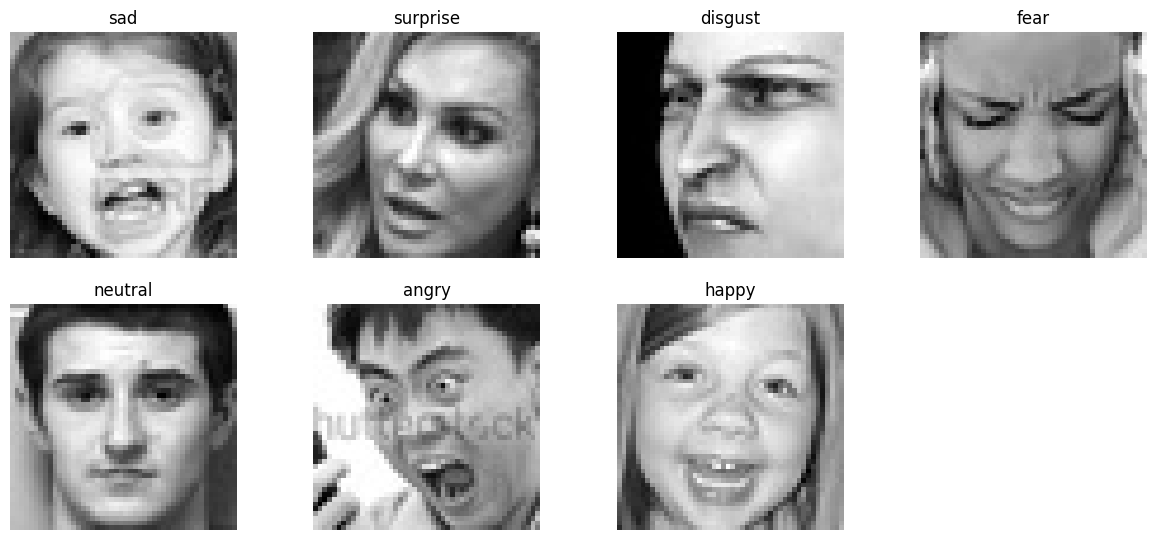

In [ ]:
# Visualize 1 image from each emotion

train_dir = 'train'
emotions = os.listdir(train_dir)
print(emotions)
plt.figure(figsize=(15,10))
for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    print(folder)
    print(os.listdir(folder))
    img_path = os.path.join(folder, os.listdir(folder)[2])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

### Few images for selected emotion

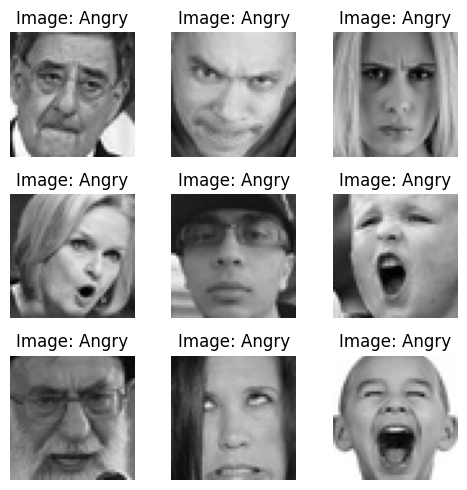

In [ ]:
# Plot few images from respective emotion directory

def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        # image = Image.open(image_path)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_name}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

# Placeholder for the directory path
angry_directory_path = 'train/angry'  # Replace with your directory path
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

# ImageDataGenerators

## Non augmented data

In [ ]:
# Non augmented data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

train_data_nonaug = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(48,48),
                                               class_mode = 'categorical',seed=42)
test_data_nonaug = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(48,48),
                                               class_mode = 'categorical',seed=42)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Augmented data ( Better results )

In [ ]:
# Reducig overfitting is known as regularization
# Data augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,
                                       shear_range=0.2,zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True,
                                      fill_mode='nearest') # divide pizel for normalization

test_datagen = ImageDataGenerator(rescale=1./255) # convert to tensors

print('Augmented data')
train_data = train_datagen.flow_from_directory(train_dir,
                                                                target_size=(48,48),
                                                                batch_size=32,
                                                                color_mode='grayscale',
                                                                class_mode='categorical',
                                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                                                target_size=(48,48),
                                                                batch_size=32,
                                                                color_mode='grayscale',
                                                                class_mode='categorical',
                                                                )


Augmented data
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
print(images[0].shape)

(48, 48, 1)


In [ ]:
# View the first batch of labels
labels

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
 

# Additional Imports


In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
import tensorflow as tf
from PIL import Image
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model

# Model 1 - CNN Baseline ( Very simple model )

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Baseline, a 3 layer Convolutional Neural Network)
model1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(48, 48, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(7, activation='softmax') # output layer (specify output shape)
])

# Compile the model
model1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history1 = model1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

898/898 [==============================] - 97s 106ms/step - loss: 1.6116 - accuracy: 0.3748 - val_loss: 1.5009 - val_accuracy: 0.4185


In [ ]:
# Input Shape
model1.input_shape

(None, 48, 48, 3)

In [ ]:
#Save Model
model1.save('emotion.h5')

In [ ]:
model1.save('emotion.keras')

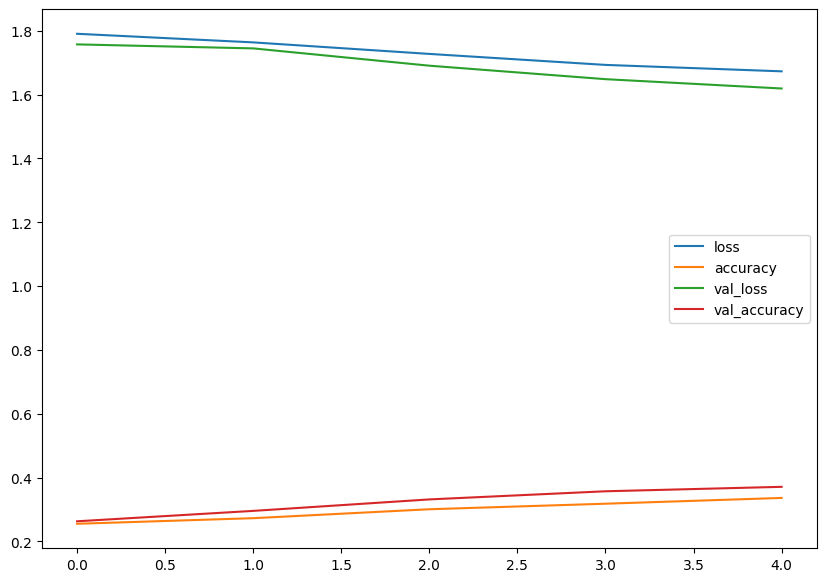

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(10, 7));

## Plot loss curves function

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

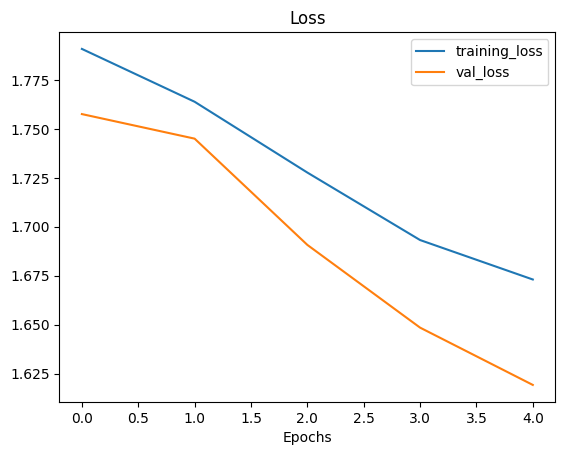

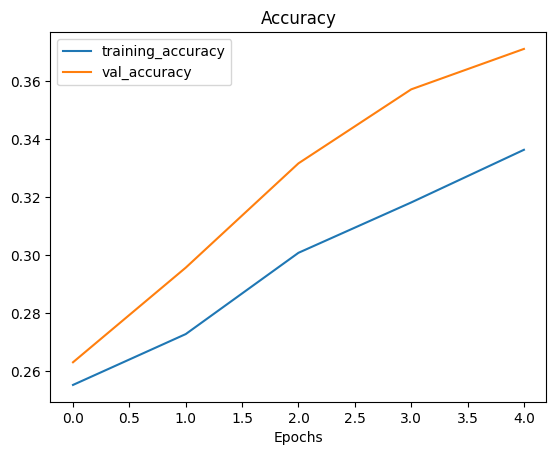

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history1)

# Model 2 - Adding MaxPool2D to baseline

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(48, 48, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(7, activation='softmax')
])

# Compile model (same as model_4)
model2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history2 = model2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
898/898 [==============================] - 43s 46ms/step - loss: 1.8055 - accuracy: 0.2519 - val_loss: 1.7863 - val_accuracy: 0.2534
Epoch 2/5
898/898 [==============================] - 46s 51ms/step - loss: 1.7863 - accuracy: 0.2548 - val_loss: 1.7798 - val_accuracy: 0.2579
Epoch 3/5
898/898 [==============================] - 43s 47ms/step - loss: 1.7802 - accuracy: 0.2592 - val_loss: 1.7624 - val_accuracy: 0.2690
Epoch 4/5
898/898 [==============================] - 42s 46ms/step - loss: 1.7709 - accuracy: 0.2656 - val_loss: 1.7511 - val_accuracy: 0.2856
Epoch 5/5
898/898 [==============================] - 43s 48ms/step - loss: 1.7639 - accuracy: 0.2696 - val_loss: 1.7354 - val_accuracy: 0.2933


## Alternative

In [ ]:
# Build a CNN ( Tiny VGG CNN Explainer website)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu',input_shape=(48,48,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    #tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='softmax')
])

model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history = model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

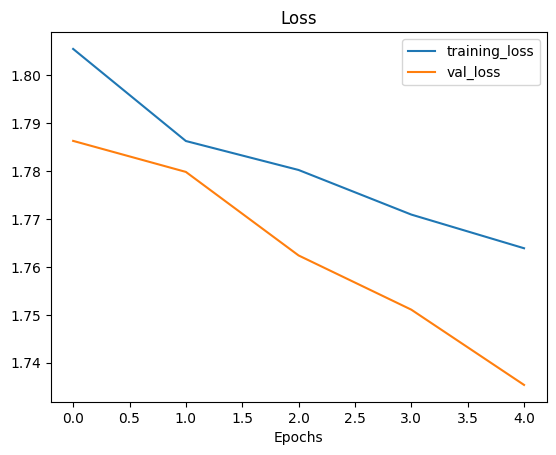

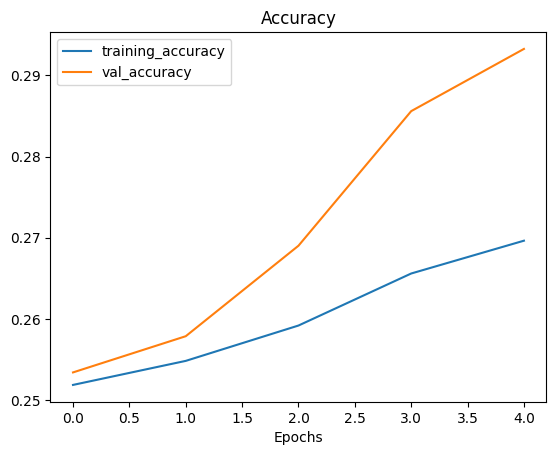

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history2)

#Advanced Model 3 - Increased complexity + Dropout

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, MaxPooling2D,Dropout
from tensorflow.keras import Sequential

In [ ]:
# Create the model
import tensorflow as tf
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(7, activation='softmax'))

model3.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())

# Add early stopping callback as well
history3 = model3.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=30,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

KeyboardInterrupt: 

#Advanced Model 4 - Different variation

In [ ]:
# create model structure
model4 = Sequential()

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation='softmax'))

#cv2.ocl.setUseOpenCL(False)

model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model
history4 = model4.fit(
                            train_data,
                            steps_per_epoch=len(train_data),
                            epochs=30,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


In [ ]:
# save model structure
model_json = emotion_model.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('model4.h5')

# Advanced Model 5 - Increased complexity + Batch Normalization

In [ ]:
# Initialising the CNN
model5 = Sequential()

# Adding convolutional layers with activations on the same line for clarity
model5.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer="glorot_uniform", padding='same', input_shape=(img_width, img_height, 1)))
model5.add(Activation('relu'))
model5.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(2, 2))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Activation('relu'))
model5.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Activation('relu'))
model5.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

# Flattening and adding dense layers
model5.add(Flatten())
model5.add(Dense(1024))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))

# Output layer
model5.add(Dense(7))
model5.add(Activation('softmax'))

In [ ]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model5.summary()

# Train the model
history5 = model5.fit(
    train_data,
    epochs=30,
    validation_data=test_data,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


# Advanced Model 6 - Function + Variation

In [ ]:
# Example CNN model
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation='softmax')  # Assuming 7 classes for facial expressions
    ])
    return model

# Define input shape
input_shape = (48, 48, 3)

# Create and compile the model
model6 = create_cnn_model(input_shape)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model6.summary()

# Train the model
history6 = model6.fit(
    train_data,
    epochs=30,
    validation_data=test_data,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)       

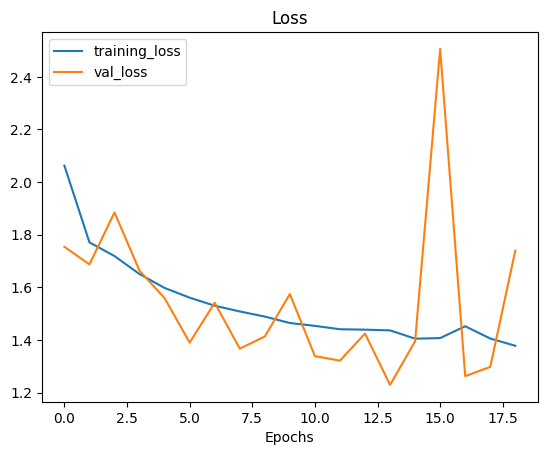

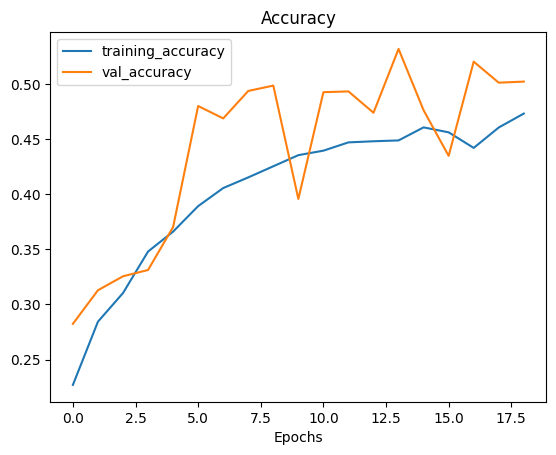

In [ ]:
# Plot loss curves
plot_loss_curves(history6)

## Predict and plotting function

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

# Model 7 - Advanced Variation + Callbacks

In [ ]:
train_data_dir = 'train'
test_data_dir = 'test'

# Set some parameters
img_width, img_height = 48, 48
batch_size = 64
epochs = 10
num_classes = 7  # 7 emotions

## New image data generators

In [ ]:

data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)

# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training')

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation')

test_generator = data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',)
    # subset='validation')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Initialising the CNN
model7 = Sequential()

# Adding convolutional layers with activations on the same line for clarity
model7.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer="glorot_uniform", padding='same', input_shape=(img_width, img_height, 1)))
model7.add(Activation('relu'))
model7.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(2, 2))
model7.add(Dropout(0.25))

model7.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model7.add(Activation('relu'))
model7.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model7.add(Activation('relu'))
model7.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model7.add(Activation('relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

# Flattening and adding dense layers
model7.add(Flatten())
model7.add(Dense(1024))
model7.add(Activation('relu'))
model7.add(Dropout(0.5))

# Output layer
model7.add(Dense(num_classes))
model7.add(Activation('softmax'))

In [ ]:
model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 activation_9 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                 

In [ ]:
# Class Labels

print("Training ", train_generator.class_indices)

print("Validation ", validation_generator.class_indices)

print("Testing ", test_generator.class_indices)

Training class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
# Compiling the model
model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

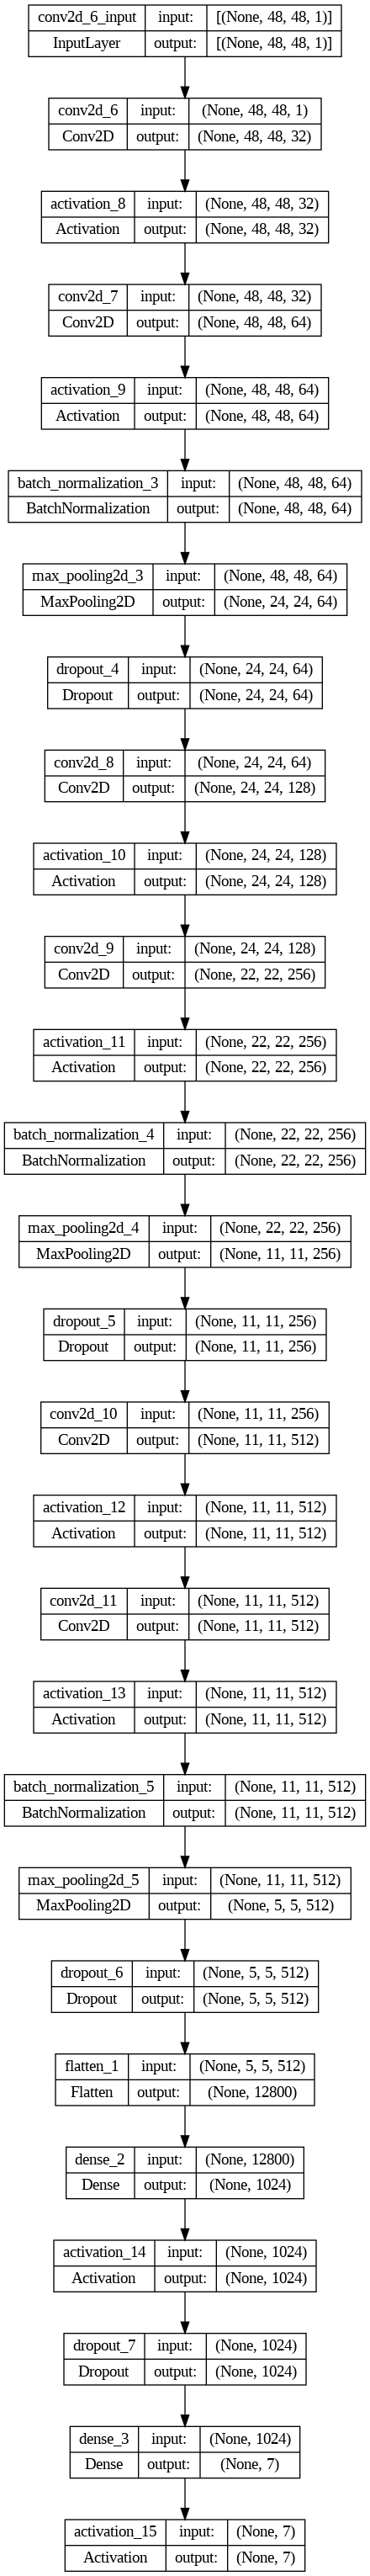

In [ ]:
plot_model(model7,
           show_shapes=True, show_layer_names=True)

## Adding callbacks

In [ ]:
# File path for the model checkpoint
path1 = 'model_checkpoints1'
path2 = 'model7.keras'
chk_path = os.path.join(path1, path2)

# Model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Log training data
csv_logger = CSVLogger(os.path.join(path1,'training.log'))


callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case



In [ ]:
train_generator.samples # 22968

train_spe = train_generator.samples // train_generator.batch_size + 1
validation_spe = validation_generator.samples // validation_generator.batch_size + 1
test_spe = test_generator.samples // test_generator.batch_size + 1

In [ ]:
history7 = model7.fit(
    train_generator,
    steps_per_epoch=train_spe,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_spe,
    callbacks=callbacks)

Epoch 1/20
359/359 [==============================] - ETA: 0s - loss: 7.6519 - accuracy: 0.3948
Epoch 1: val_loss improved from 14.19725 to 6.34270, saving model to model_checkpoints/cnn_model10.keras
359/359 [==============================] - 29s 71ms/step - loss: 7.6519 - accuracy: 0.3948 - val_loss: 6.3427 - val_accuracy: 0.4424 - lr: 1.0000e-04
Epoch 2/20
359/359 [==============================] - ETA: 0s - loss: 5.3704 - accuracy: 0.4414
Epoch 2: val_loss improved from 6.34270 to 4.55842, saving model to model_checkpoints/cnn_model10.keras
359/359 [==============================] - 26s 71ms/step - loss: 5.3704 - accuracy: 0.4414 - val_loss: 4.5584 - val_accuracy: 0.4708 - lr: 1.0000e-04
Epoch 3/20
359/359 [==============================] - ETA: 0s - loss: 3.9491 - accuracy: 0.4833
Epoch 3: val_loss improved from 4.55842 to 3.45616, saving model to model_checkpoints/cnn_model10.keras
359/359 [==============================] - 26s 71ms/step - loss: 3.9491 - accuracy: 0.4833 - val_lo

## Plot training history

In [ ]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

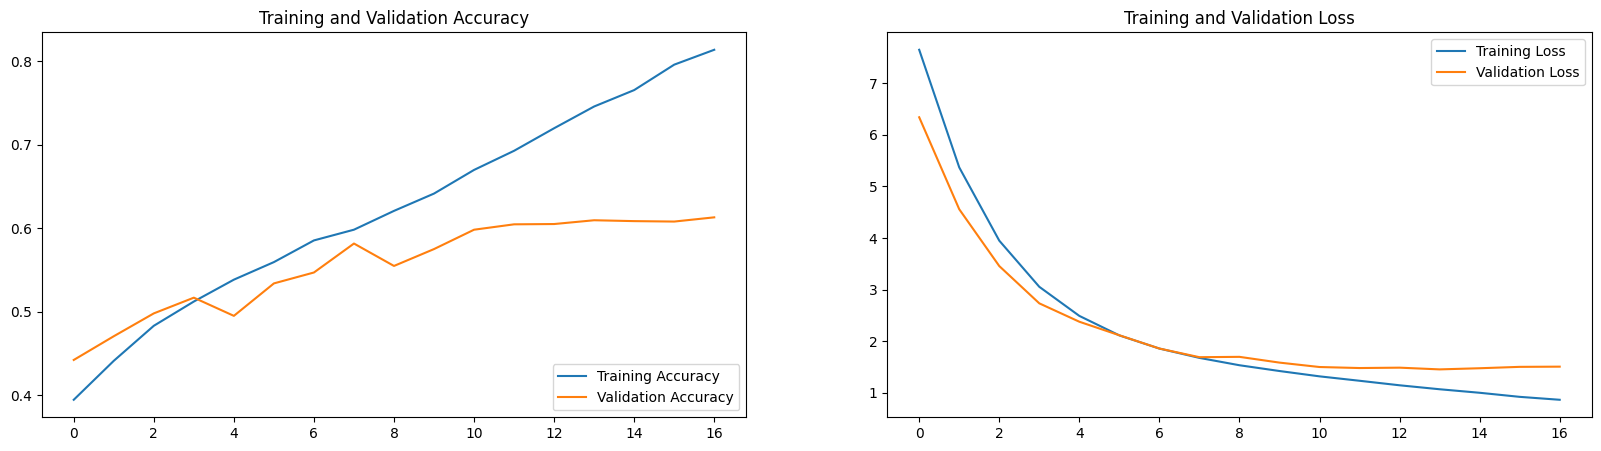

In [ ]:
plot_training_history(history7)

## Evaluate Predictions

In [ ]:
train_loss, train_accu = model7.evaluate(train_generator)
test_loss, test_accu = model7.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 3s 27ms/step - loss: 1.4378 - accuracy: 0.6179
final train accuracy = 86.73 , validation accuracy = 61.79


113/113 [==============================] - 5s 35ms/step


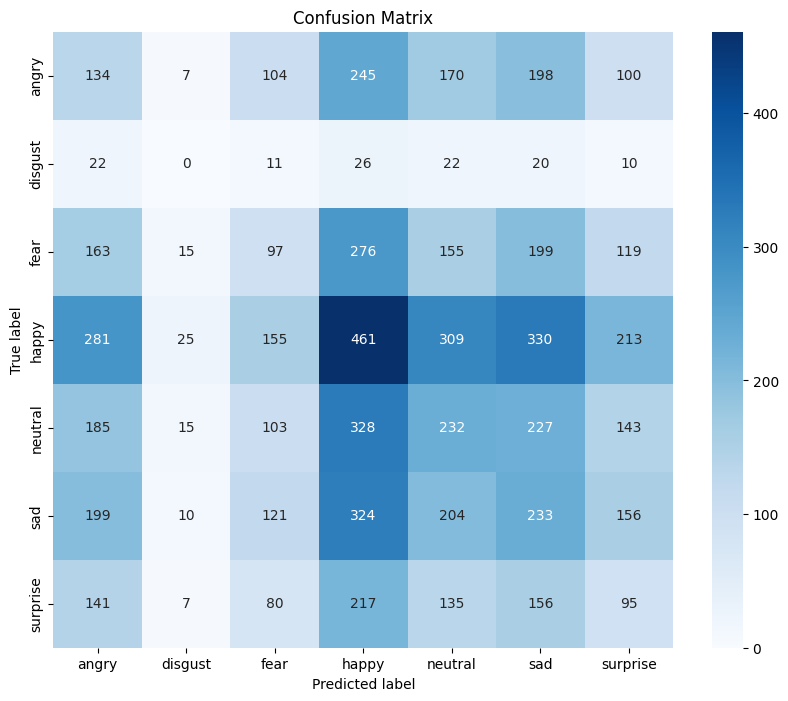

In [ ]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model7.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Printing the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.12      0.14      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.09      0.11      1024
       happy       0.25      0.26      0.25      1774
     neutral       0.19      0.19      0.19      1233
         sad       0.17      0.19      0.18      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



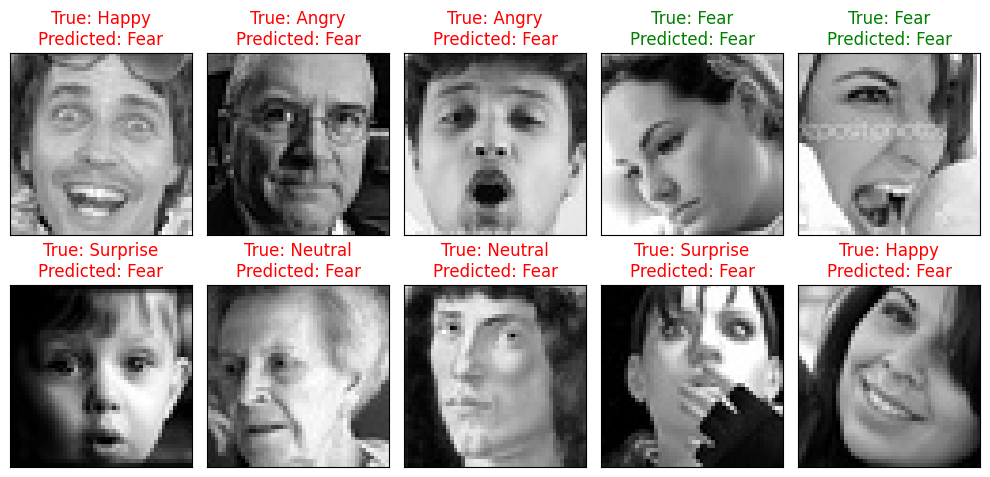

In [ ]:
# Emotion classes for the dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Assuming test_generator and model are already defined
batch_size = test_generator.batch_size

# Selecting a random batch from the test generator
Random_batch = np.random.randint(0, len(test_generator) - 1)

# Selecting random image indices from the batch
Random_Img_Index = np.random.randint(0, batch_size, 10)

# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the model
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()

# Model 8 - Adding data augmentation

## Augmented Data Generator

In [ ]:

data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_data_generator = ImageDataGenerator(rescale=1./255)


# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training')

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation')

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
    )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


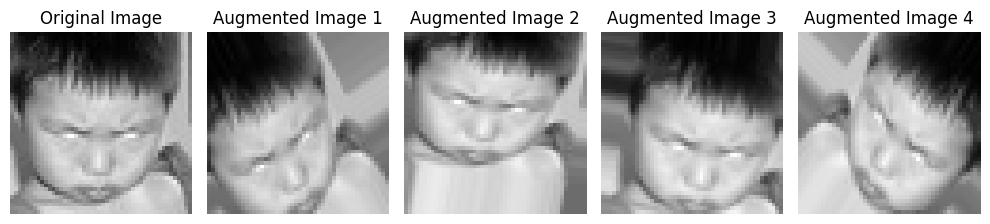

In [ ]:
# Path to your specific image
image_path = '/content/train/angry/Training_10118481.jpg'

# Load and convert the image to an array
img = load_img(image_path, color_mode='grayscale', target_size=(img_width, img_height))  # Adjust color_mode if necessary
img_array = img_to_array(img)  # Converts the image to a numpy array
img_array = img_array.reshape((1,) + img_array.shape)  # Reshapes the image to (1, width, height, channels) for the generator

# Setting up the plot
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
# Plot the original image first. Since img_array is a 3D array after reshaping, we use [:, :, 0]
axes[0].imshow(img_array[0, :, :, 0], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Generate and plot augmented images
for i, ax in enumerate(axes.flat[1:]):  # Start from the second subplot
    # Generate a batch of augmented images
    aug_iter = data_generator.flow(img_array, batch_size=1)
    aug_img = next(aug_iter)[0]  # Get the first augmented image from the batch

    # Plot the augmented image. We directly use [:, :, 0] without an initial batch index
    ax.imshow(aug_img[:, :, 0], cmap='gray')
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Callbacks

In [ ]:
# File path for the model checkpoint
path1 = 'model_checkpoints2'
path2 = 'cnn_model8_augmented.keras'
chk_path = os.path.join(path1, path2)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(path1,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case

In [ ]:
# Assuming img_width, img_height, and classes are defined. For example:
img_width, img_height = 48, 48
classes = 7

#Initialising the CNN
model8 = tf.keras.models.Sequential()

# Adding convolutional layers with activations on separate lines
model8.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(img_width, img_height, 1)))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(2, 2))
model8.add(Dropout(0.25))

model8.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

model8.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

# Flattening and adding dense layers
model8.add(Flatten())
model8.add(Dense(1024))
model8.add(tf.keras.layers.Activation('relu'))
model8.add(Dropout(0.5))

model8.add(Dense(classes))
model8.add(tf.keras.layers.Activation('softmax'))

# Compiling the model
model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history8 = model8.fit(
    train_generator,
    steps_per_epoch=train_spe
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_spe,
    callbacks=callbacks)

Epoch 1/100
359/359 [==============================] - ETA: 0s - loss: 12.5095 - accuracy: 0.2175
Epoch 1: val_loss improved from inf to 12.68249, saving model to model_checkpoints2/cnn_model11_augmented.keras
359/359 [==============================] - 36s 89ms/step - loss: 12.5095 - accuracy: 0.2175 - val_loss: 12.6825 - val_accuracy: 0.1684 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - ETA: 0s - loss: 10.3380 - accuracy: 0.2384
Epoch 2: val_loss improved from 12.68249 to 9.90142, saving model to model_checkpoints2/cnn_model11_augmented.keras
359/359 [==============================] - 57s 159ms/step - loss: 10.3380 - accuracy: 0.2384 - val_loss: 9.9014 - val_accuracy: 0.2005 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 8.2814 - accuracy: 0.2426
Epoch 3: val_loss improved from 9.90142 to 7.54121, saving model to model_checkpoints2/cnn_model11_augmented.keras
359/359 [==============================] - 45s 126ms/step - 

In [ ]:
plot_training_history(history8)

In [ ]:
train_loss, train_accu = model8.evaluate(train_generator)
test_loss, test_accu = model8.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

In [ ]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model8.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

# Transfer Learning Models

## Model 9 - EfficientNetB0

In [ ]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "efficient_net/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

### Feature extraction

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

# Create base model
input_shape = (48, 48, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model9 = tf.keras.Model(inputs, outputs)

# Compile the model
model9.compile(loss="categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history9 = model9.fit(train_data,
                            epochs=30,
                            #steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            #validation_steps=int(0.15 * len(test_data)),
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),model_checkpoint])

Epoch 1/30
898/898 [==============================] - 101s 53ms/step - loss: 1.8279 - accuracy: 0.2405 - val_loss: 1.8421 - val_accuracy: 0.2471
Epoch 2/30
898/898 [==============================] - 46s 52ms/step - loss: 1.8250 - accuracy: 0.2393 - val_loss: 1.8284 - val_accuracy: 0.2471
Epoch 3/30
898/898 [==============================] - 46s 51ms/step - loss: 1.8268 - accuracy: 0.2395 - val_loss: 1.8279 - val_accuracy: 0.2471
Epoch 4/30
898/898 [==============================] - 49s 55ms/step - loss: 1.8256 - accuracy: 0.2413 - val_loss: 1.8401 - val_accuracy: 0.2471
Epoch 5/30
 54/898 [>.............................] - ETA: 37s - loss: 1.8179 - accuracy: 0.2355

KeyboardInterrupt: 

In [ ]:
model9.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 48, 48, 3)]       0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_8 (Dense)             (None, 7)                 8967      
                                                                 
 softmax_float32 (Activatio  (None, 7)                 0         
 n)                                                              
                                                           

In [ ]:
# Are any of the layers in our model frozen?
for layer in fmodel.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "float32">
pooling_layer True float32 <Policy "float32">
dense_8 True float32 <Policy "float32">
softmax_float32 True float32 <Policy "float32">


In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in fmodel.layers[1].layers[-20:]:
   layer.trainable = True
   print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

block6d_project_conv True float32 <Policy "float32">
block6d_project_bn True float32 <Policy "float32">
block6d_drop True float32 <Policy "float32">
block6d_add True float32 <Policy "float32">
block7a_expand_conv True float32 <Policy "float32">
block7a_expand_bn True float32 <Policy "float32">
block7a_expand_activation True float32 <Policy "float32">
block7a_dwconv True float32 <Policy "float32">
block7a_bn True float32 <Policy "float32">
block7a_activation True float32 <Policy "float32">
block7a_se_squeeze True float32 <Policy "float32">
block7a_se_reshape True float32 <Policy "float32">
block7a_se_reduce True float32 <Policy "float32">
block7a_se_expand True float32 <Policy "float32">
block7a_se_excite True float32 <Policy "float32">
block7a_project_conv True float32 <Policy "float32">
block7a_project_bn True float32 <Policy "float32">
top_conv True float32 <Policy "float32">
top_bn True float32 <Policy "float32">
top_activation True float32 <Policy "float32">


In [ ]:
# ## Saving model to Google Drive (optional)

# # Create save path to drive
# save_dir = "drive/MyDrive/tensorflow_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/"
# # os.makedirs(save_dir) # Make directory if it doesn't exist

# # Save model
# model.save(save_dir)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
# Compile the model
model9.compile(loss="categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [ ]:
# Start to fine-tune (all layers)
history9 = model9.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Epoch 1/100
898/898 [==============================] - 160s 119ms/step - loss: 1.8159 - accuracy: 0.2481 - val_loss: 1.8163 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 2/100
898/898 [==============================] - 107s 119ms/step - loss: 1.8133 - accuracy: 0.2513 - val_loss: 1.8147 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 3/100
898/898 [==============================] - 76s 85ms/step - loss: 1.8126 - accuracy: 0.2513 - val_loss: 1.8149 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 4/100
898/898 [==============================] - 108s 121ms/step - loss: 1.8122 - accuracy: 0.2513 - val_loss: 1.8141 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 5/100
898/898 [==============================] - 79s 88ms/step - loss: 1.8121 - accuracy: 0.2513 - val_loss: 1.8151 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 6/100
201/898 [=====>........................] - ETA: 57s - loss: 1.8086 - accuracy: 0.2558

KeyboardInterrupt: 

## Model 10 - VGGFace TensorflowAddons

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

# Load VGGFace model
vggface_model = tfa.networks.vggface.VGGFace(include_top=False, input_shape=(48, 48, 3), pooling='avg')

# Freeze the pre-trained layers
vggface_model.trainable = False

# Add additional layers for fine-tuning or classification
model = tf.keras.Sequential([
    vggface_model,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # Assuming num_classes is the number of emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Errors !

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


AttributeError: module 'tensorflow_addons' has no attribute 'networks'

## Model 11 - Mobile Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Adam
from tensorflow.keras.models import Model

# Load MobileNetV2 model without the top (classification) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7 ,activation='softmax')(x)  # Assuming num_classes is the number of emotions

# Combine the base model with your custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=test_data)

# Errors !

ImportError: cannot import name 'Adam' from 'tensorflow.keras.layers' (/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py)

## Model 12 - VGGNET

In [ ]:
# Define paths to the train and validation directories
train_data_dir = '/content/train'
test_data_dir = '/content/test'

# validation_data_dir = '/content/emotion_detection_project/datasets/raw/test'

# Set some parameters
img_width, img_height = 224, 224  # Size of images
batch_size = 64
epochs = 10
num_classes = 7  # Update this based on the number of your classes

# Rescale the pixel values (0-255) to the [0, 1] interval
data_generator = ImageDataGenerator(
                                rescale = 1 / 255.,
                                rotation_range=10,
                                zoom_range=0.2,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                fill_mode='nearest',
                                # validation_split=0.2
                                )

test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
                                train_data_dir,
                                target_size=(img_width, img_height),
                                batch_size=batch_size,
                                class_mode='categorical',
                                color_mode='rgb',
                                subset='training',
                                shuffle = True)

test_generator = test_preprocessor.flow_from_directory(
                                test_data_dir,
                                target_size=(img_width, img_height),
                                batch_size=batch_size,
                                class_mode='categorical',
                                color_mode='rgb',)
                                # subset='validation')

In [ ]:
# Extract class labels for all instances in the training dataset
classes = np.array(train_generator.classes)

# Calculate class weights to handle imbalances in the training data
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
class_weights = compute_class_weight(
    class_weight='balanced',  # Strategy to balance classes
    classes=np.unique(classes),  # Unique class labels
    y=classes  # Class labels for each instance in the training dataset
)

# Create a dictionary mapping class indices to their calculated weights
class_weights_dict = dict(enumerate(class_weights))

# Output the class weights dictionary
print("Class Weights Dictionary:", class_weights_dict)

In [ ]:
classes = 7

# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

# Load the VGG16 base model, excluding its top (fully connected) layers
vgg = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
vgg.summary()

In [ ]:
# Make the specified layers non-trainable
for layer in vgg.layers[:-3]:
    layer.trainable = False

vgg.summary()

In [ ]:
classes

In [ ]:
# Flattening the layer and adding custom Dense layers
x = Flatten()(vgg.output)

# Adding a fully connected layer with ReLU activation and He normal initializer
x = Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization

x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization

# Adding the output layer with softmax activation
# Note: Adjust the number of units to match the number of classes you have
output = Dense(7, activation='softmax', kernel_initializer='he_normal')(x)

# Creating the model
model12 = Model(inputs=vgg.input, outputs=output)

# Compile the model
model12.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])

# Model summary to see all layers
model12.summary()


In [ ]:
# File path for the model checkpoint
cnn_path = 'model_checkpoints3'
name = 'model12_vgg16.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
# validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

In [ ]:
plot_training_history(history)

In [ ]:
train_loss, train_accu = model12.evaluate(train_generator)
test_loss, test_accu = model12.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

In [ ]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model12.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

## Model 13 - ResNet50 (Best)

In [4]:
# Directory paths for training and testing data
train_dir = 'train'
test_dir = 'test'

# Batch size for data generators
batch_size = 64

# Data augmentation configuration for training data
train_datagen = ImageDataGenerator(
                                  rescale=1 / 255.,
                                  rotation_range=10,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                 )

test_datagen = ImageDataGenerator(
                                  rescale=1 / 255.
                                 )

# Data generators for training and testing data
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    class_mode="categorical",
                                                    target_size=(224, 224),
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    subset='training'
                                                   )

test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  class_mode="categorical",
                                                  target_size=(224, 224),
                                                  color_mode="rgb",
                                                  shuffle=False,
                                                  batch_size=batch_size
                                                 )


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Class weights for imbalanced data

In [5]:
# Extract class labels for all instances in the training dataset
classes = np.array(train_generator.classes)

# Calculate class weights to handle imbalances in the training data
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
class_weights = compute_class_weight(
    class_weight='balanced',  # Strategy to balance classes
    classes=np.unique(classes),  # Unique class labels
    y=classes  # Class labels for each instance in the training dataset
)

# Create a dictionary mapping class indices to their calculated weights
class_weights_dict = dict(enumerate(class_weights))

# Output the class weights dictionary
print("Class Weights Dictionary:", class_weights_dict)

Class Weights Dictionary: {0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


In [6]:
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

94668760/94668760 [==============================] - 4s 0us/step


In [7]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [8]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(0.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(0.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [9]:
model13 = Create_ResNet50V2_Model()
model13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [10]:
model13.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# File path for the model checkpoint
path1 = 'resnet_checkpoints'
path2 = 'model13_resnet50.keras'
chk_path = os.path.join(path1,path2)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 7,
                          restore_best_weights = True,
                          verbose=1)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=2,
#                             min_lr=0.00005,
                              verbose=1)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(path1,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, csv_logger]  # Adjusted as per your use-case

train_spe = train_generator.samples // train_generator.batch_size + 1
# validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_spe = test_generator.samples // test_generator.batch_size + 1

In [ ]:
history13 = model13.fit(
                          train_generator,
                          steps_per_epoch=train_spe,
                          epochs=30,
                          validation_data=test_generator,
                          validation_steps=test_spe,
                          class_weight=class_weights_dict,
                          callbacks = callbacks
                         )

Epoch 1/30
449/449 [==============================] - ETA: 0s - loss: 1.7012 - accuracy: 0.3910
Epoch 1: val_loss improved from inf to 92.50460, saving model to resnet_checkpoints/model13_resnet50.keras
449/449 [==============================] - 480s 1s/step - loss: 1.7012 - accuracy: 0.3910 - val_loss: 92.5046 - val_accuracy: 0.3037
Epoch 2/30
449/449 [==============================] - ETA: 0s - loss: 1.3914 - accuracy: 0.4832
Epoch 2: val_loss improved from 92.50460 to 1.54560, saving model to resnet_checkpoints/model13_resnet50.keras
449/449 [==============================] - 417s 926ms/step - loss: 1.3914 - accuracy: 0.4832 - val_loss: 1.5456 - val_accuracy: 0.4092
Epoch 3/30
449/449 [==============================] - ETA: 0s - loss: 1.2980 - accuracy: 0.5218
Epoch 3: val_loss improved from 1.54560 to 1.26243, saving model to resnet_checkpoints/model13_resnet50.keras
449/449 [==============================] - 403s 898ms/step - loss: 1.2980 - accuracy: 0.5218 - val_loss: 1.2624 - va

In [ ]:
plot_training_history(history13)

In [ ]:
train_loss, train_accu = model13.evaluate(train_generator)
test_loss, test_accu = model13.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

In [ ]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model13.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

In [ ]:
model13.save("resnet_model.keras")

In [ ]:
model13.save('resnet_model.h5')

In [ ]:
from google.colab import files
files.download('resnet_model.h5')

In [ ]:
import tensorflow as tf
try:
  best_model = tf.keras.models.load_model(chk_path)
except:
  pass
else:
  from keras.models import load_model
  best_model = load_model(chk_path)

best_model.save('resnet_best.h5')

from google.colab import files
files.download('resnet_best.h5')

### Image Prep & Prediction Functions

In [ ]:
def prepare_image(img_pil):
    """Preprocess the PIL image to fit your model's input requirements."""
    # Convert the PIL image to a numpy array with the target size
    img = img_pil.resize((224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert single image to a batch.
    img_array /= 255.0  # Rescale pixel values to [0,1], as done during training
    return img_array



# Define the Gradio interface
def predict_emotion(image):
    # Preprocess the image
    processed_image = prepare_image(image)
    # Make prediction using the model
    prediction = model.predict(processed_image)
    # Get the emotion label with the highest probability
    predicted_class = np.argmax(prediction, axis=1)
    predicted_emotion = index_to_emotion.get(predicted_class[0], "Unknown Emotion")
    return predicted_emotion